<a href="https://colab.research.google.com/github/gabrielrflopes/estudos/blob/main/IBM_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CognitiveClass.ai - Data Analysis with Python

As part of the Data Analysis with Python course, in this notebook we will study the data from 1985 automobiles, in order to train exploratory data analysis, data wrangling, model development and model evaluation with a real world dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'  

df = pd.read_csv(data, header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Variable dictionary

Below are the lists of attributes of the autos dataset.

1. `symboling`: -3, -2, -1, 0, 1, 2, 3.
2. `normalized-losses`: continuous from 65 to 256.
3. `make`: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. `fuel-type`: diesel, gas.
5. `aspiration`: std, turbo.
6. `num-of-doors`: four, two.
7. `body-style`: hardtop, wagon, sedan, hatchback, convertible.
8. `drive-wheels`: 4wd, fwd, rwd.
9. `engine-location`: front, rear.
10. `wheel-base`: continuous from 86.6 120.9.
11. `length`: continuous from 141.1 to 208.1.
12. `width`: continuous from 60.3 to 72.3.
13. `height`: continuous from 47.8 to 59.8.
14. `curb-weight`: continuous from 1488 to 4066.
15. `engine-type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `num-of-cylinders`: eight, five, four, six, three, twelve, two.
17. `engine-size`: continuous from 61 to 326.
18. `fuel-system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `bore`: continuous from 2.54 to 3.94.
20. `stroke`: continuous from 2.07 to 4.17.
21. `compression-ratio`: continuous from 7 to 23.
22. `horsepower`: continuous from 48 to 288.
23. `peak-rpm`: continuous from 4150 to 6600.
24. `city-mpg`: continuous from 13 to 49.
25. `highway-mpg`: continuous from 16 to 54.
26. `price`: continuous from 5118 to 45400.

### Defining the headers for the dataset

In [2]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
           'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
           'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
           'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
           'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df.columns = headers

print('The name of the columns in the dataset:\n\n', 
      df.columns)

The name of the columns in the dataset:

 Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Exploratory Data Analysis

In [4]:
print('This dataset has:',
      '\n{} entries'.format(df.shape[0]),
      '\n{} variables'.format(df.shape[1]))

This dataset has: 
205 entries 
26 variables


In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

We notice that some of the variables are in the incorrect format, such as `bore` and `price`. Analysing the data, some columns has rows filled with '?', that are not informative and inables us to convert the variables to the correct format. 

In [6]:
df.replace('?', np.nan, inplace = True)

In [7]:
df.price = pd.to_numeric(df.price, errors = 'coerce')

df.price.dtypes

dtype('float64')

### Converting the values

In [8]:
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [9]:
missing_values = (df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)[:10]

missing_values

normalized-losses    20.00000
price                 1.95122
stroke                1.95122
bore                  1.95122
peak-rpm              0.97561
num-of-doors          0.97561
horsepower            0.97561
engine-type           0.00000
highway-mpg           0.00000
city-mpg              0.00000
dtype: float64

### How to deal with missing data?

**Drop data**

a. Drop the whole row

b. Drop the whole column

**Replace data**

a. Replace it by mean

b. Replace it by frequency

c. Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. 

We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

**Replace by mean:**

- normalized-losses: 41 missing data, replace them with mean
- stroke: 4 missing data, replace them with mean
- bore: 4 missing data, replace them with mean
- horsepower: 2 missing data, replace them with mean
- peak-rpm: 2 missing data, replace them with mean

**Replace by frequency:**

- num-of-doors: 2 missing data, replace them with "four".

Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

**Drop the whole row:**

- price: 4 missing data, simply delete the whole row

Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

**Removing the rows of missing values in `price`**

In [10]:
df_clean = df.copy()

df_clean.dropna(subset = ['price'], axis = 0, inplace = True)

df_clean.isna().sum().sort_values(ascending = False )[:10]

normalized-losses    37
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
symboling             0
engine-type           0
highway-mpg           0
city-mpg              0
dtype: int64

### Replacing the missing values

We will replace all the NaN in these variables with their respective mean values.

**`Normalized-losses`**

In [11]:
avg_norm_loss = df_clean['normalized-losses'].mean()
print('Average of normalized-loss:', avg_norm_loss)

Average of normalized-loss: 122.0


In [12]:
df_clean['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)

**`bore`**

In [13]:
avg_bore = df_clean['bore'].mean().round(1)
print('Average of bore:', avg_bore)

Average of bore: 3.3


In [14]:
df_clean['bore'].replace(np.nan, avg_bore, inplace = True)

**`stroke`**

In [15]:
avg_stroke = df_clean['stroke'].mean().round(1)
print('Average of stroke:', avg_stroke)

Average of stroke: 3.3


In [16]:
df_clean['stroke'].replace(np.nan, avg_stroke, inplace = True)

**`horsepower`**

In [17]:
avg_hp = df_clean['horsepower'].mean().round(1)
print('Average of horsepower:', avg_hp)

Average of horsepower: 103.4


In [18]:
df_clean['horsepower'].replace(np.nan, avg_hp, inplace = True)

**`peak-rpm`**

In [19]:
avg_peakrpm = df_clean['peak-rpm'].mean().round(1)
print('Average of peak-rpm:', avg_peakrpm)

Average of peak-rpm: 5117.6


In [20]:
df_clean['peak-rpm'].replace(np.nan, avg_peakrpm, inplace = True)

### Replace by frequency

For the variable `num-of-doors` we will replace the missing values with the most frequent value.

In [21]:
df_clean['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [22]:
df_clean['num-of-doors'].value_counts().idxmax()

'four'

In [23]:
df_clean['num-of-doors'].replace(np.nan, 'four', inplace = True)

We have succesfully removed all missing values from our dataset and stored on `df_clean`.

In [24]:
(df_clean.isna().sum() / df_clean.shape[0] * 100).sort_values(ascending = False)[:10]

symboling            0.0
normalized-losses    0.0
highway-mpg          0.0
city-mpg             0.0
peak-rpm             0.0
horsepower           0.0
compression-ratio    0.0
stroke               0.0
bore                 0.0
fuel-system          0.0
dtype: float64

In [25]:
# We will convert the normalized-losses column to int64

df_clean['normalized-losses'] = df_clean['normalized-losses'].astype('int64')

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

### Data formatting

We want to convert the values of the variable `city-mpg` from miles per gallon to liters per Km. To do this, we will use data formatting in the column.

In [27]:
df_clean['city-mpg'] = 235 / df_clean['city-mpg']

df_clean.rename(columns = {'city-mpg': 'city-L/Km'}, inplace = True)

We'll do the same thing for the `highway-mpg` variable, turning it into `highway-L/Km`.

In [28]:
df_clean['highway-mpg'] = 235 / df_clean['highway-mpg']

df_clean.rename(columns = {'highway-mpg': 'highway-L/Km'}, inplace = True)

In [29]:
df_clean.head().round(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/Km,highway-L/Km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.5,2.7,9.0,111.0,5000.0,11.2,8.7,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.5,2.7,9.0,111.0,5000.0,11.2,8.7,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.7,3.5,9.0,154.0,5000.0,12.4,9.0,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.2,3.4,10.0,102.0,5500.0,9.8,7.8,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.2,3.4,8.0,115.0,5500.0,13.1,10.7,17450.0


### Data normalization

In [30]:
# Simple feature scaling method
df_clean['length'] = df_clean['length'] / df_clean['length'].max() 
df_clean['width'] = df_clean['width'] / df_clean['width'].max()
df_clean['height'] = df_clean['height'] / df_clean['height'].max()

Here we can see we've normalized "length", "width" and "height" in the range of \[0,1].

In [31]:
df_clean[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Bining

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

**Example:**

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [32]:
# Converting horsepower to int64]

df_clean['horsepower'] = df_clean['horsepower'].astype('int64')

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>

In [33]:
bins = np.linspace(min(df_clean['horsepower']), max(df_clean['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

We set group names

In [34]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.

In [35]:
df_clean['horsepower-binned'] = pd.cut(df_clean['horsepower'], bins, labels = group_names, include_lowest = True)

# pd.cut() - Bin values into discrete intervals.

# Use cut when you need to segment and sort data values into bins. This
# function is also useful for going from a continuous variable to a
# categorical variable.

df_clean[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
10,101,Low


<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals from 59 to 3!
</p>


In [36]:
df_clean['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

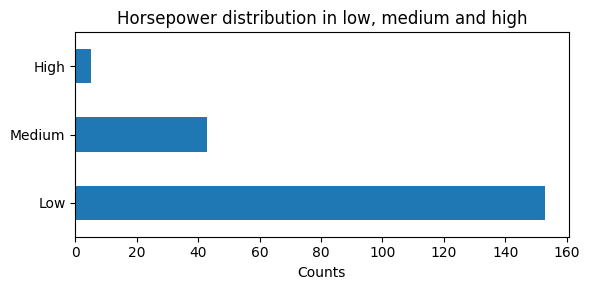

In [37]:
fig, ax = plt.subplots(figsize = (6, 3))

df_clean['horsepower-binned'].value_counts().plot(kind = 'barh')

ax.set_title('Horsepower distribution in low, medium and high')
ax.set_xlabel('Counts')

fig.tight_layout()
fig.show()

### Indicator variable

<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>

<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [38]:
df_clean['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

To get the indicator variables from the `fuel-type` variable, we can use the `pd.get_dummies()` function.

In [39]:
# Assigning the indicator variables into a new dataframe called dummy_variable
dummy_variable = pd.get_dummies(df['fuel-type'])

dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We will change the columns names for clarity

In [40]:
dummy_variable.rename(columns = {'diesel': 'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace = True)

dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Now we will merge the two dataframes using `pd.concat()`.

In [41]:
df_clean = pd.concat([df_clean, dummy_variable], axis = 1)

Now that we have the two columns with indicator variables refering to the fuel type, we can drop the `fuel-type` variable from the dataset.

In [42]:
df_clean.drop('fuel-type', axis = 1, inplace = True)

df_clean.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/Km,highway-L/Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3.0,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3.0,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1.0,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2.0,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2.0,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1


### Creating an indicator variable for the `aspiration` column

In [43]:
df_clean['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [44]:
dummy_variable_asp = pd.get_dummies(df_clean['aspiration'])

dummy_variable_asp.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [45]:
dummy_variable_asp.rename(columns = {'std': 'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace = True)

dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [46]:
df_clean = pd.concat([df_clean, dummy_variable_asp], axis = 1)

In [47]:
df_clean.drop('aspiration', axis = 1, inplace = True)

df_clean.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/Km,highway-L/Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3.0,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3.0,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1.0,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2.0,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2.0,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [48]:
print('DataFrame dimensions:\n', 
      '\nBefore:', df.shape,
      '\nAfter:', df_clean.shape)

DataFrame dimensions:
 
Before: (205, 26) 
After: (205, 29)


Notice that the DataFrame after should have 201 entries instead of 205. This means that our new columns have rows that don't correspond to any datapoint.

Let's check the last 5 entries to be sure:

In [50]:
df_clean.tail()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/Km,highway-L/Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
204,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,114.0,5400.0,12.368421,9.4,22625.0,Low,0,1,0,1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0


As you can see, the last 4 rows are filled with NaN, except for the dummy variables columns. We will drop these rows in order to get the DataFrame in order again.

In [52]:
df_clean.drop(index = [9, 44, 45, 129], axis = 0, inplace = True)

df_clean.tail()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/Km,highway-L/Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
200,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,114.0,5400.0,10.217391,8.392857,16845.0,Low,0,1,1,0
201,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,160.0,5300.0,12.368421,9.400000,19045.0,Medium,0,1,0,1
202,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,134.0,5500.0,13.055556,10.217391,21485.0,Medium,0,1,1,0
203,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,106.0,4800.0,9.038462,8.703704,22470.0,Low,1,0,0,1
204,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,114.0,5400.0,12.368421,9.400000,22625.0,Low,0,1,0,1


### Saving the cleaned dataframe to csv format

In [53]:
df_clean.to_csv('clean_df.csv')